# EDA of Summarization Data
### June 19th 2020

In [4]:
# Outside imports
import os
import importlib
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [2]:
# load real data
data_path = '/Users/rowancassius/Desktop/capstone/data/context_task_data_fresh.tsv'
dat = pd.read_csv(data_path, sep='\t')

# fill nas
dat.fillna('', inplace=True)



In [12]:
# value counts
dat.Labeler.value_counts()

Rowan      509
Natalie    499
George     339
Percy      100
Name: Labeler, dtype: int64

In [48]:
# data
dat['SumWC'] = dat.Summary.apply(lambda s: len(s.split()))
dat['TaskWC'] = dat.TaskSentence.apply(lambda s: len(s.split()))

In [63]:
pd.set_option('display.max_colwidth', -1)
cols = ['Context', 'TaskSentence', 'TaskWC', 'Summary', 'SumWC', 'Labeler']
dat[cols].sample(10)

,Context,TaskSentence,TaskWC,Summary,SumWC,Labeler
929,,Can we please send an Amendment letter to Forcenergy Inc. increasing the collateral threshold in the recently signed Master Swap agreement to 7.5MM?,23,Send Ammendment letter to Forcenergy Inc.,6,George
376,"I got a copy of 2000 Definitions Annex via distribution today.. However, I did not know of nor do I have the 2000 Definitions, which apparently restated/conformed the 1991/1998 basic ISDA definitions.. Our Master still refs 1991, as amended etc., so it probably does pick up the 2000 issuance by ISDA.. Do you have the 2000?. Do we need to order?. Should we consider revising the master agreement in respect of the definition incorporation language?",Give me a call.,4,Call SENDER,2,Rowan
1176,"Heather,. Attached is an Excel file containg deals with Dow over the last three years.",Please call me with any questions ypu may have.,9,Call SENDER with questions about deals with Dow,8,Natalie
739,"Shirley,","Please, register me.",3,Register me.,2,George
1154,,Please respond to dchang@aer.com,4,Respond to dchange@aer.com,3,Natalie
944,"Shirley,","Please, coordinate this interview.",4,Coordinate interview.,2,George
964,"And Enron made an astronomical profit during the California energy crisis last year.. As a result, there are thousands of consumers who are unable to pay their basic energy bills and the largest utility in the state is bankrupt.. The New York Times reported that you sold 101 million worth of Enron stock while aggressively urging the company's employees to keep buying it.",Please donate this money to the funds set up to help repair the lives of those Americans hurt by Enron's underhanded dealings.,22,Donate money to funds to help repair the lives of those Americans hurt by Enron's dealings,16,Natalie
615,Why am I receiving copies of everyones responses to this group.. I would like to receive information but do not want to be copied on requests for removal or additions.,Please try to correct this problem.,6,"Correct problem: ""Why is SENDER receiving copies of everyones responses to this group"".",13,George
1131,Ron: It looks like Jane has not received these questions.. Let me know where they are in terms of being answered.. Thanks!. Ben. This message and any attachments are intended for the individual or entity named above.,Let me know where they are in terms of being answered,11,Respond to SENDER about questions,5,Natalie
510,"The attached worksheet contains a preliminary list of potential customers for the Bandwidth launch on EnronOnline.. This list is currently a work in progress, but I wanted to get it into your hands ASAP.",Please begin the process of reviewing this list as well as the complete EnronOnline counterparty list for Bandwidth trading.,19,Review preliminary list of potential customers as well as the complete EnronOnline counterparty list for Bandwidth trading,17,Percy


In [59]:
len("You bought 80 shares of BRCD Brocade Communications Sys I Com at 245 13/16.. ORDER DETAILS: The tracking number for this order is: B-300-AAYM-8378 Order entered at: 14:36:12 on 11/02/00 Order processing began at: 14:36:12 Order executed at: 14:36:13 on 11/02/00. You will receive a printed Datek Online confirmation by postal mail, or by electronic delivery if you are subscribed to that service.. Questions regarding this transaction?. Contact our Customer Support department by e-mailing support@datek.com.".split())

75

In [62]:
dat.groupby('Labeler').TaskWC.mean()

Labeler
George     14.123894
Natalie    14.456914
Percy      12.310000
Rowan      13.603143
Name: TaskWC, dtype: float64

In [50]:
dat.groupby('Labeler').SumWC.mean()

Labeler
George     5.539823
Natalie    7.332665
Percy      5.740000
Rowan      5.025540
Name: SumWC, dtype: float64

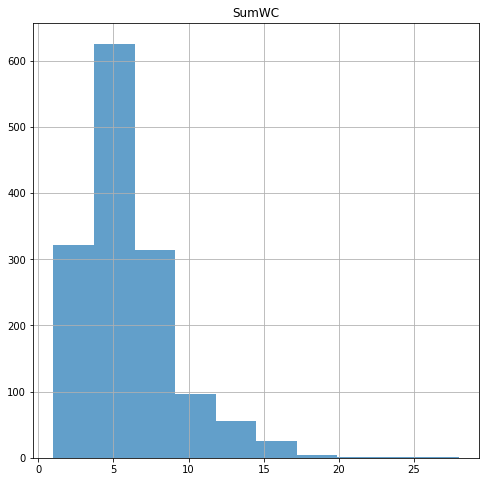

In [51]:
dat[['SumWC', 'Labeler']].hist(figsize = (8,8), sharex = True, alpha = 0.7)
plt.show()

## Examine Summaries with WordCount > 15

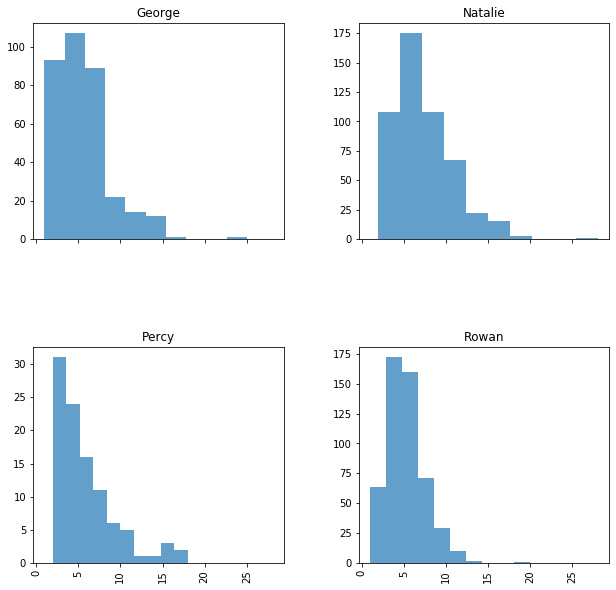

In [52]:
dat[['SumWC', 'Labeler']].hist(by = 'Labeler', figsize = (10,10), sharex = True, alpha = 0.7)
plt.show()

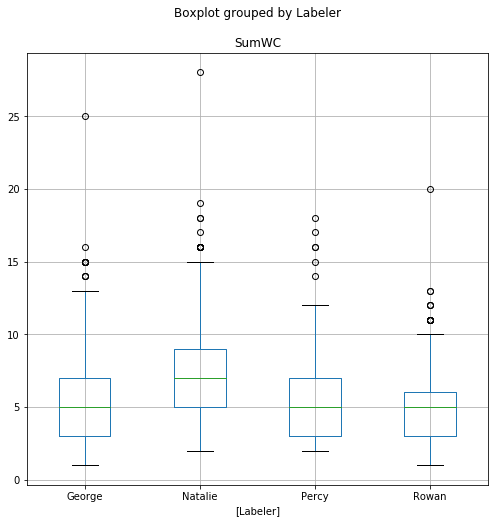

In [54]:
dat[['SumWC', 'Labeler']].boxplot(by = 'Labeler', figsize = (8,8))
plt.show()

### Checking Task Sentence Word Count

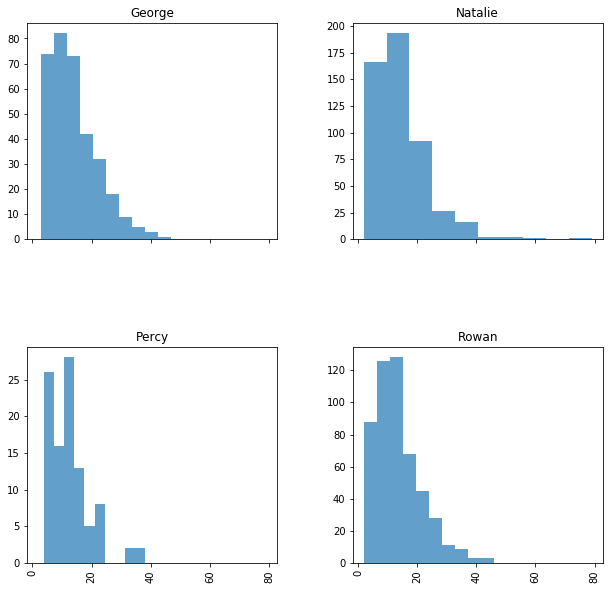

In [56]:
dat[['TaskWC', 'Labeler']].hist(by = 'Labeler', figsize = (10,10), sharex = True, alpha = 0.7)
plt.show()

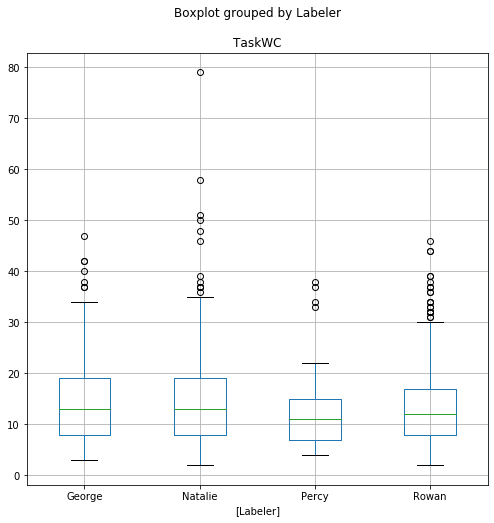

In [58]:
dat[['TaskWC', 'Labeler']].boxplot(by = 'Labeler', figsize = (8,8))
plt.show()